In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from datetime import datetime

fname = '../../../hackathon_data/classC_ship1_MRG.csv'
classC_ship1_MRG = pd.read_csv('/home/ec2-user/hackathon_data/classC_ship1_MRG.csv')
#classC_ship1_MRG

print classC_ship1_MRG.shape
classC_noDup = classC_ship1_MRG.drop_duplicates()
print classC_noDup.shape


(109699, 58)
(40660, 58)


In [12]:
times = pd.to_datetime(classC_noDup['DateTime'])
classC_noDup['timeFormat'] = times

print type(classC_noDup['timeFormat'][0])

# classC_ship1_MRG

<class 'pandas._libs.tslib.Timestamp'>


/home/ec2-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
#classC_noDup.timeFormat[0:100]
#index = classC_noDup.timeFormat #[0:20]
#print index[0:20].astype(np.int64)/10**9

#import pandas.DataFrame
classC_sort = classC_noDup.sort_values(['timeFormat'])
#pd.DataFrame.sort(classC_ship1_MRG,'timeFormat',inplace=True)

print classC_sort.shape
classC_sort




(40660, 59)


,Indicator,MRG1 TN GEAR FWD BRG T,MRG1 PRI TN GEAR ENGGED,MRG2 SEC TN GEAR DISENG,MRG2 THR BRG OIL TEMP,MRG1 PRI TN GEAR DISENG,MRG1 LO PMP A DISC PRES,MRG1 THR BRG AHEAD TEMP,MRG1 SEC TN GEAR DISENG,MRG1 THR BRG ASTN TEMP,...,MRG1 LS GR AFT BRG TEMP,MRG2 LO STR DP,MRG2 THR BRG AHEAD TEMP,MRG2 LO CLR OUT TEMP,MRG1 LO STR DP,MRG2 HMRB PT2 PRES,DateTime,MRG2 LS GR AFT BRG TEMP,MRG2 SEC TN GEAR ENGGED,timeFormat
0,MRG,103.199997,0.0,NaN,NaN,1.0,44.0,109.000000,1.0,108.599998,...,103.199997,NaN,NaN,NaN,4.2,NaN,9/8/2016 3:41:04 PM,NaN,NaN,2016-09-08 15:41:04
6701,MRG1,103.199997,0.0,NaN,NaN,1.0,44.0,109.000000,1.0,108.599998,...,103.199997,NaN,NaN,NaN,4.2,NaN,9/8/2016 3:41:04 PM,NaN,NaN,2016-09-08 15:41:04
70383,MRG2,103.199997,0.0,NaN,NaN,1.0,44.0,109.000000,1.0,108.599998,...,103.199997,NaN,NaN,NaN,4.2,NaN,9/8/2016 3:41:04 PM,NaN,NaN,2016-09-08 15:41:04
1,MRG,103.199997,0.0,NaN,NaN,1.0,44.0,109.000000,1.0,108.599998,...,103.199997,NaN,NaN,NaN,4.9,NaN,9/8/2016 3:41:05 PM,NaN,NaN,2016-09-08 15:41:05
6702,MRG1,103.199997,0.0,NaN,NaN,1.0,44.0,109.000000,1.0,108.599998,...,103.199997,NaN,NaN,NaN,4.9,NaN,9/8/2016 3:41:05 PM,NaN,NaN,2016-09-08 15:41:05
70384,MRG2,103.199997,0.0,NaN,NaN,1.0,44.0,109.000000,1.0,108.599998,...,103.199997,NaN,NaN,NaN,4.9,NaN,9/8/2016 3:41:05 PM,NaN,NaN,2016-09-08 15:41:05
2,MRG,103.199997,0.0,NaN,NaN,1.0,44.0,109.000000,1.0,108.599998,...,103.199997,NaN,NaN,NaN,4.2,NaN,9/8/2016 3:41:37 PM,NaN,NaN,2016-09-08 15:41:37
6703,MRG1,103.199997,0.0,NaN,NaN,1.0,44.0,109.000000,1.0,108.599998,...,103.199997,NaN,NaN,NaN,4.2,NaN,9/8/2016 3:41:37 PM,NaN,NaN,2016-09-08 15:41:37
70385,MRG2,103.199997,0.0,NaN,NaN,1.0,44.0,109.000000,1.0,108.599998,...,103.199997,NaN,NaN,NaN,4.2,NaN,9/8/2016 3:41:37 PM,NaN,NaN,2016-09-08 15:41:37
6704,MRG1,107.000000,0.0,NaN,NaN,1.0,44.0,109.000000,1.0,106.000000,...,103.099998,NaN,NaN,NaN,4.8,NaN,9/8/2016 3:51:37 PM,NaN,NaN,2016-09-08 15:51:37


(40660, 59)
40660 40660


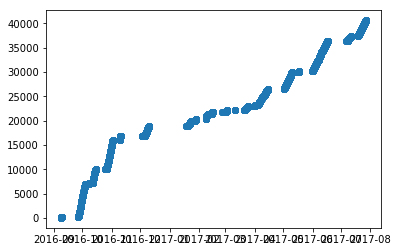

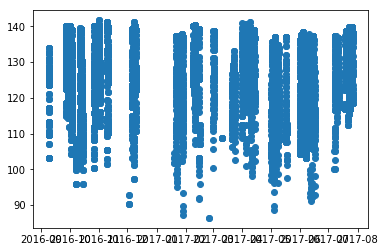

In [32]:
print classC_sort.shape
print len(np.linspace(0,40661,40660)), len(classC_sort.timeFormat)

plt.figure(2)
plt.plot(classC_sort.timeFormat,np.linspace(0,40661,40660),'o')

plt.figure(3)
plt.plot(classC_sort.timeFormat,classC_sort['MRG1 TN GEAR FWD BRG T'],'o')

plt.show()
#classC_noDup.timeFormat

In [58]:
# find time differences

times = classC_sort['timeFormat'].astype('int64')/10**9
time_diffs = times.diff() # number of seconds between rows
time_diffs = time_diffs.drop(0)

#print times[0:20]
print time_diffs[0:10]
print type(time_diffs[1])
print np.sum(time_diffs>0) # number of unique time stamps

print np.sum(np.isnan(time_diffs))

print max(time_diffs), min(time_diffs)



6701       0.0
70383      0.0
1          1.0
6702       0.0
70384      0.0
2         32.0
6703       0.0
70385      0.0
6704     600.0
70386      0.0
Name: timeFormat, dtype: float64
<type 'numpy.float64'>
29273
0
3441271.0 0.0


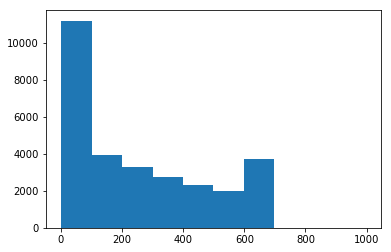

In [70]:
time_bool = np.logical_and( time_diffs != 0, time_diffs < 1000)
time_diff_subset = time_diffs[time_bool]
plt.figure(4)
plt.hist(time_diff_subset)

plt.show()

#classC_sort.to_csv('/home/ec2-user/sorted_C1_S1_MRG.csv')



In [ ]:
#classC_noDup.loc[classC_noDup['DateTime'] == '9/8/2016 3:41:04 PM']